Перед вами ряд значений среднегодового объёма популяции рыси.

Какая из автокорреляционных функций соответствует этому ряду?

* Нерегулярные волны.

Перед вами ряд уровней среднемесячной номинальной заработной платы в России. Какими свойствами обладает этот ряд?

* Автокоррелированность
* Повышающийся тренд
* Выраженная годовая сезонность

В приложенном файле — данные по ежемесячному уровню производства молока в фунтах на одну корову.

Загрузите ряд, например, так:

```python
milk = pd.read_csv('monthly-milk-production.csv',';', index_col=['month'], parse_dates=['month'], dayfirst=True)
```
   
и постройте его график. Какой из приведённых ниже графиков у вас получился?

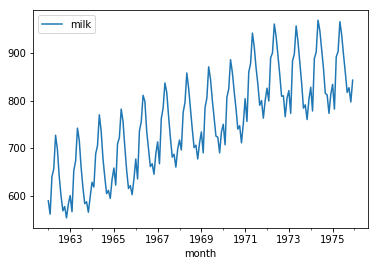

In [5]:
import pandas
from matplotlib import pyplot

%matplotlib inline

milk = pandas.read_csv('monthly-milk-production.csv', ';', index_col=['month'], parse_dates=['month'], dayfirst=True)
milk.plot.line()
pyplot.show()

Примените к ряду из предыдущего вопроса критерий Дики-Фуллера. Это делается так:

```python
import statsmodels.api as sm
sm.tsa.stattools.adfuller(ряд)
```

Чему равен полученный достигаемый уровень значимости? Округлите до двух знаков после десятичной точки.

In [8]:
milk.head()

,milk
month,
1962-01-01,589
1962-02-01,561
1962-03-01,640
1962-04-01,656
1962-05-01,727


In [12]:
import statsmodels

_, p, _, _, _, _ = statsmodels.api.tsa.stattools.adfuller(milk['milk'])
print(f'P-value: {p:.2f}')

P-value: 0.63


Часто, когда вы имеете дело с величинами, представляющими собой сумму значений показателя за каждый день или за каждый рабочий день, имеет смысл перед началом прогнозирования поделить весь ряд на число дней в периоде. Например, если поделить ряд с объёмом производства молока на одну корову на число дней в месяце, полученная величина будет меняться более плавно, и для неё легче будет построить прогнозирующую модель.

Корректно определить число дней в месяце можно с помощью свойства `days_in_month` у индекса ряда или функции `monthrange` из пакета `calendar`. Используйте число дней в месяце для того, чтобы вычислить новый показатель — среднее дневное число полученного молока на одну корову. Постройте график этого ряда и убедитесь, что он стал более гладким.

В качестве ответа введите сумму значений полученного показателя за весь период; округлите до двух знаков после десятичной точки.

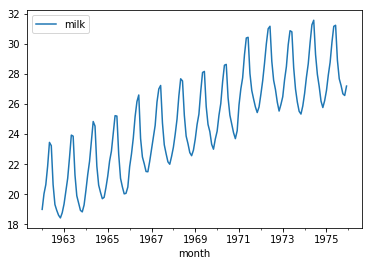

In [20]:
normalised_milk = pandas.DataFrame(milk['milk'] / milk.index.days_in_month)
normalised_milk.plot.line()
pyplot.show()

In [24]:
print(f"{normalised_milk['milk'].sum():.2f}")

4166.33
